## 1. Image Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/Feature\ Engineering/Project

/content/drive/MyDrive/Feature Engineering/Project


In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import cv2
from glob import glob

from tqdm import tqdm
import skimage
from skimage.transform import resize
from sklearn.utils import shuffle
from skimage.color import rgb2gray

import tensorflow as tf

# 1. Extraction, Separation and Preleminary Preprocessing of the image data

In [ ]:
X = []
y = []

In [ ]:
forest_fire_dataset= "Forest Fire Dataset"
#Looping through the image dataset and encoding their labels
for img in os.listdir(forest_fire_dataset):
            if img in ["fire"]: 
                fire_state = 1
            elif img in ["start_fire"]:
                fire_state = 2
            else:
                fire_state = 0
            for i in tqdm(os.listdir(forest_fire_dataset +"/" +img+"/")):
                fire_img = cv2.imread(forest_fire_dataset + "/" +img + "/" + i)
                if fire_img is not None:
                    # fire_img = rgb2gray(skimage.transform.resize(fire_img,(224,224,3), anti_aliasing=True))
                    fire_img = skimage.transform.resize(fire_img,(224,224,3), anti_aliasing=True)
                    fier_img_arr = np.asarray(fire_img)
                    X.append(fier_img_arr)
                    y.append(fire_state)

100%|██████████| 1071/1071 [00:51<00:00, 20.95it/s]


In [ ]:
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
#X, y = shuffle(X, y)

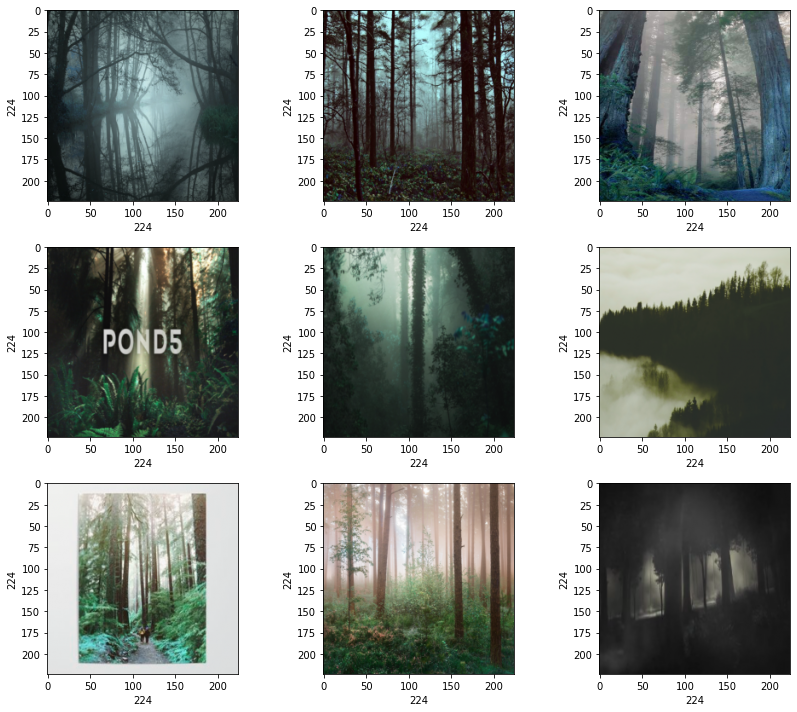

In [ ]:
#Plot images samples
plt.figure(figsize=(12,10))
a = 1

for img in range(121,130):
  plt.subplot(3,3,a)
  plt.tight_layout()
  plt.imshow(X[img-1])
  plt.xlabel(X[img-1].shape[1], fontsize=10)
  plt.ylabel(X[img-1].shape[0], fontsize=10)
  a = a+1

## Graphical representation of images

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  This is separate from the ipykernel package so we can avoid doing imports until


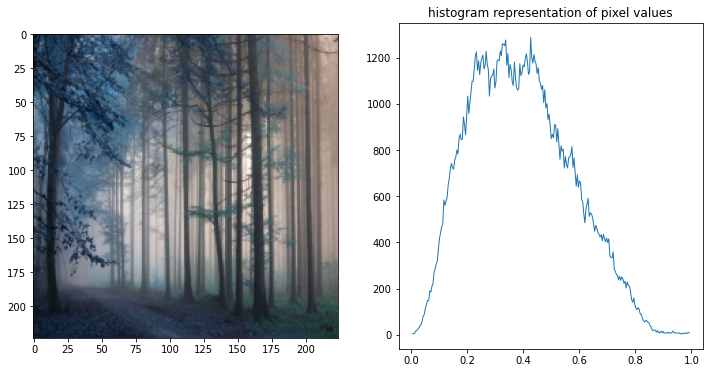

In [ ]:
#Check for pixel intensity distribution in image samples
from skimage.exposure import histogram
h, centers_for_histogram = histogram(X[8])
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow((X[8]), cmap=plt.cm.gray)
axes[1].plot(centers_for_histogram, h, lw=1);
axes[1].set_title('histogram representation of pixel values');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  """Entry point for launching an IPython kernel.


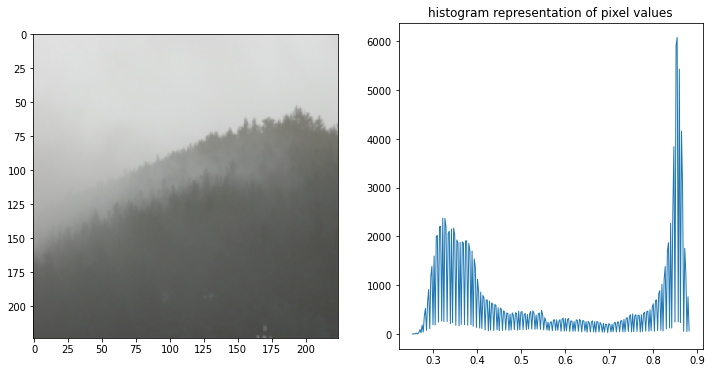

In [ ]:
h, centers_for_histogram = histogram(X[114])
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow((X[114]), cmap=plt.cm.gray)
axes[1].plot(centers_for_histogram, h, lw=1);
axes[1].set_title('histogram representation of pixel values');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  """Entry point for launching an IPython kernel.


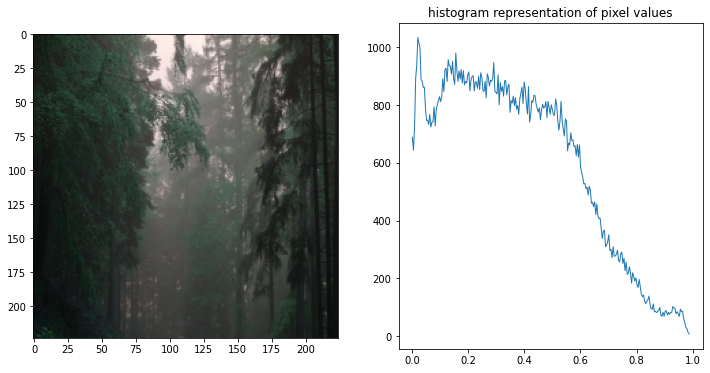

In [ ]:
h, centers_for_histogram = histogram(X[182])
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow((X[18]), cmap=plt.cm.gray)
axes[1].plot(centers_for_histogram, h, lw=1);
axes[1].set_title('histogram representation of pixel values');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  """Entry point for launching an IPython kernel.


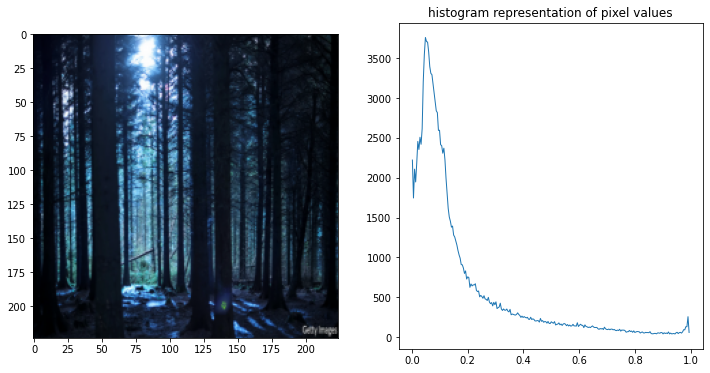

In [ ]:
h, centers_for_histogram = histogram(X[155])
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow((X[155]), cmap=plt.cm.gray)
axes[1].plot(centers_for_histogram, h, lw=1);
axes[1].set_title('histogram representation of pixel values');

# Feature Engineering

Taking a smaller subset of the data to apply different Feature Engineering techniques

In [ ]:
len(X)

2311

In [ ]:
dX = X
dy = y

## 1. Color Transformation : RGB to LAB

In [ ]:
from skimage.color import rgb2lab, lab2rgb

In [ ]:
lab_X = []

In [ ]:
for img in dX:
  lab_X.append(rgb2lab(img))

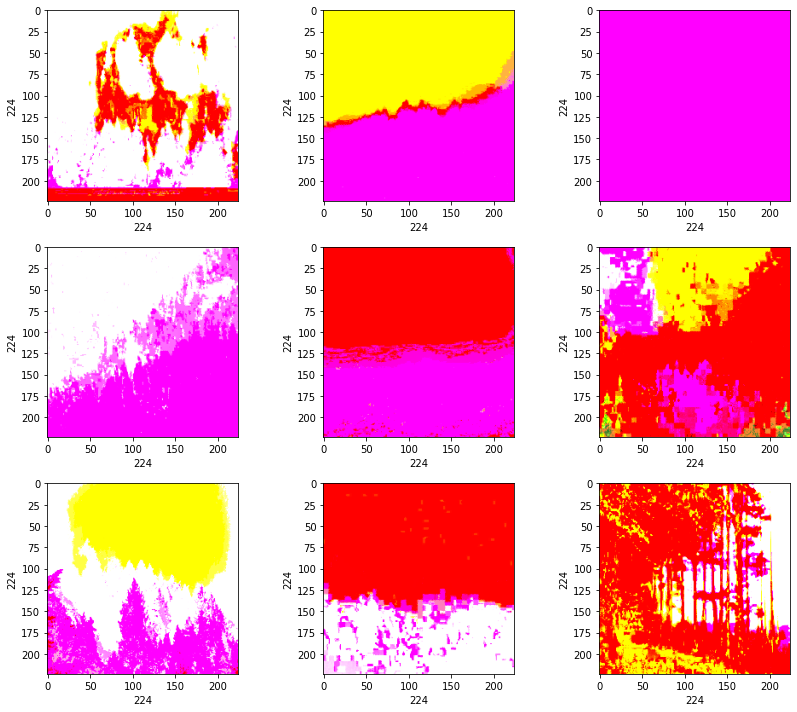

In [ ]:
plt.figure(figsize=(12,10))

for img in range(1,10):
  plt.subplot(3,3,img)
  plt.tight_layout()
  plt.imshow(lab_X[img-1])
  plt.xlabel(lab_X[img-1].shape[1], fontsize=10)
  plt.ylabel(lab_X[img-1].shape[0], fontsize=10)

## 2. Noise Filtering

**Gaussian Filter**

In [ ]:
# Gaussian filter
gf = []

for img in dX:
  gf.append(cv2.GaussianBlur(img, (3,3), 1,1))
  #mf.append(cv2.medianBlur(img, 5))

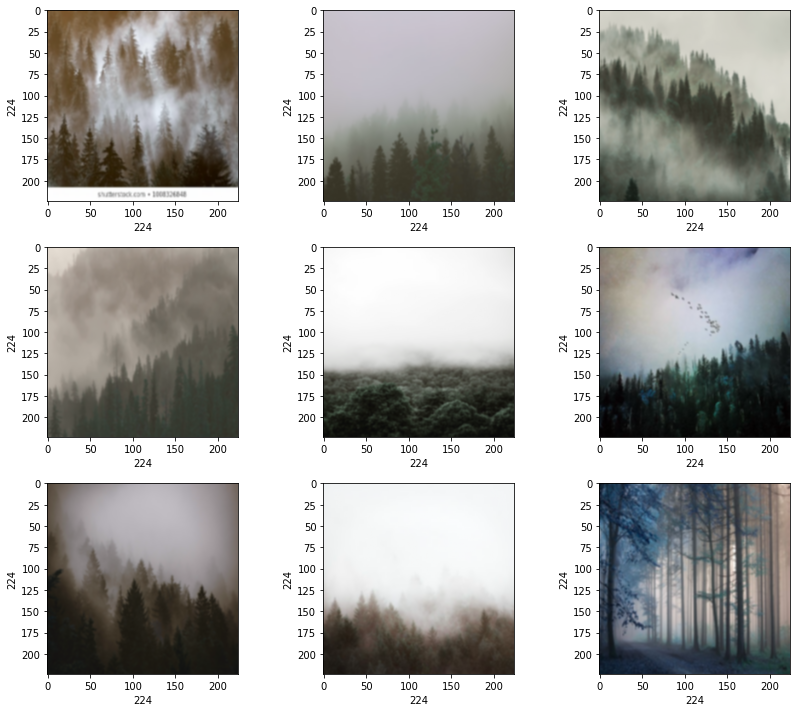

In [ ]:
plt.figure(figsize=(12,10))

for img in range(1,10):
  plt.subplot(3,3,img)
  plt.tight_layout()
  plt.imshow(gf[img-1])
  plt.xlabel(gf[img-1].shape[1], fontsize=10)
  plt.ylabel(gf[img-1].shape[0], fontsize=10)

## 3. Segmentation

In [ ]:
th = []

for img in dX:
  img = img*255
  img = img.astype(np.uint8)
  b,g,r = cv2.split(img)
  rgb_img = cv2.merge([r,g,b])
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  # noise removal
  kernel = np.ones((2,2),np.uint8)
  #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
  closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
  # sure background area
  sure_bg = cv2.dilate(closing,kernel,iterations=3)
  # Finding sure foreground area
  dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
  # Threshold
  ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
  # Finding unknown region
  sure_fg = np.uint8(sure_fg)
  unknown = cv2.subtract(sure_bg,sure_fg)
  # Marker labelling
  ret, markers = cv2.connectedComponents(sure_fg)
  # Add one to all labels so that sure background is not 0, but 1
  markers = markers+1
  # Now, mark the region of unknown with zero
  markers[unknown==255] = 0
  markers = cv2.watershed(img,markers)
  a = img
  a[markers == -1] = [255,0,0]
  th.append(a)

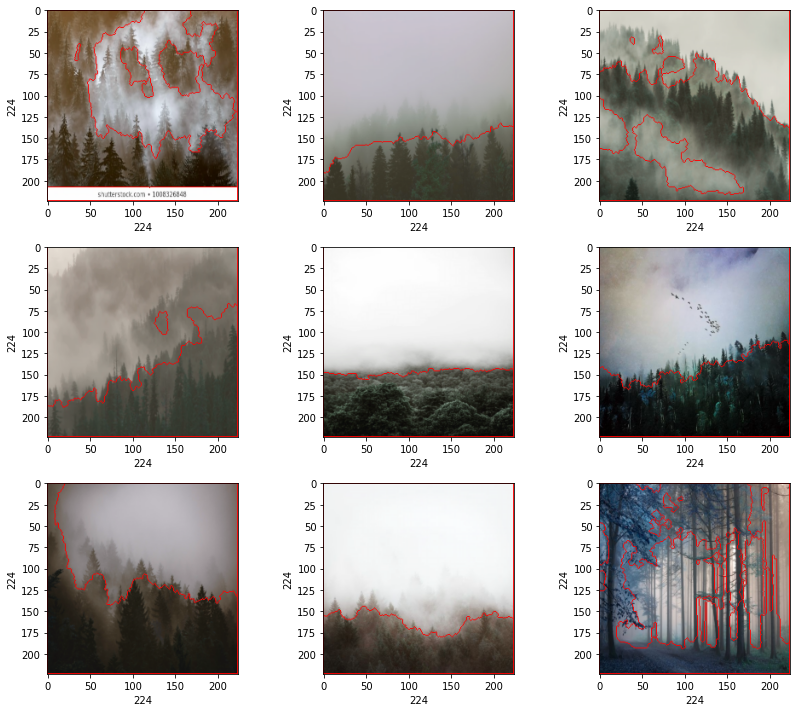

In [ ]:
plt.figure(figsize=(12,10))

for img in range(1,10):
  plt.subplot(3,3,img)
  plt.tight_layout()
  plt.imshow(th[img-1])
  plt.xlabel(th[img-1].shape[1], fontsize=10)
  plt.ylabel(th[img-1].shape[0], fontsize=10)

## 4. Thresholding

In [ ]:
th1 = []
th2 = []

for img in dX:
  img = img*255
  img = img.astype(np.uint8)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  th1.append(cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 199, 5)) #setting up the threshold values
  
  th2.append(cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 199, 5))

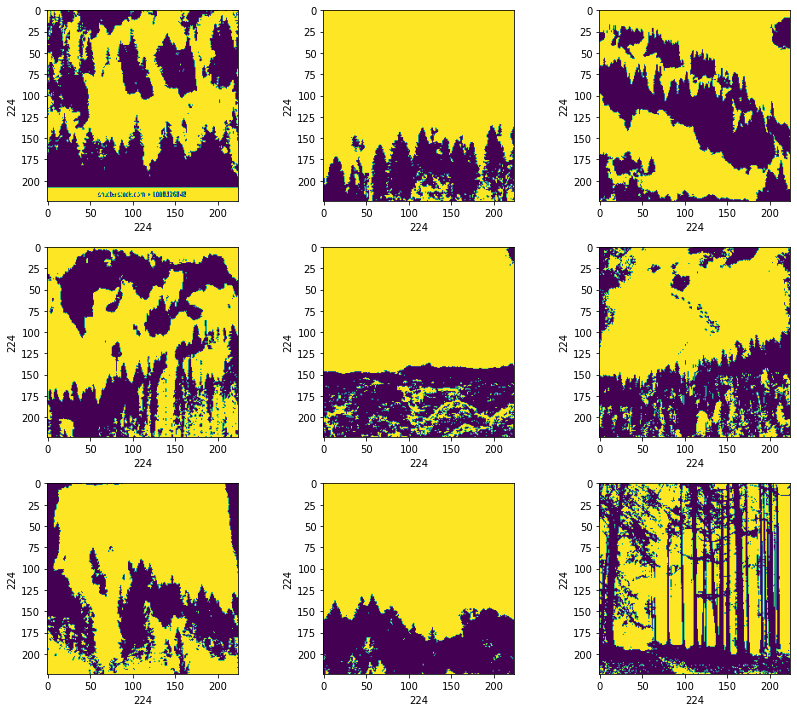

In [ ]:
#Plotting the images after thresholding
plt.figure(figsize=(12,10))

for img in range(1,10):
  plt.subplot(3,3,img)
  plt.tight_layout()
  plt.imshow(th2[img-1])
  plt.xlabel(th2[img-1].shape[1], fontsize=10)
  plt.ylabel(th2[img-1].shape[0], fontsize=10)

# 5. Edge Detection

In [ ]:
sobelx = []
sobelxx = []
sobely = []
sobelyy = []
sobelxy = []
sobelxyxy = []
edges = []
edgesx = []

for img in X:
  img = img*255
  img = img.astype(np.uint8)
  # Convert to graycsale
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Blur the image for better edge detection
  img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
  img_blurr = cv2.GaussianBlur(img, (3,3), 0)

  # Sobel Edge Detection
  sobelx.append(cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)) # Sobel Edge Detection on the X axis
  sobely.append(cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)) # Sobel Edge Detection on the Y axis
  sobelxy.append(cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)) # Combined X and Y Sobel Edge Detection

  # Sobel Edge Detection
  sobelxx.append(cv2.Sobel(src=img_blurr, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)) # Sobel Edge Detection on the X axis
  sobelyy.append(cv2.Sobel(src=img_blurr, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)) # Sobel Edge Detection on the Y axis
  sobelxyxy.append(cv2.Sobel(src=img_blurr, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)) # Combined X and Y Sobel Edge Detection
  
  # Canny Edge Detection
  edges.append(cv2.Canny(image=img_blur, threshold1=100, threshold2=200)) # Canny Edge Detection

  # Canny Edge Detection
  edgesx.append(cv2.Canny(image=img_blurr, threshold1=100, threshold2=200)) # Canny Edge Detection


**Horizontal Edges**

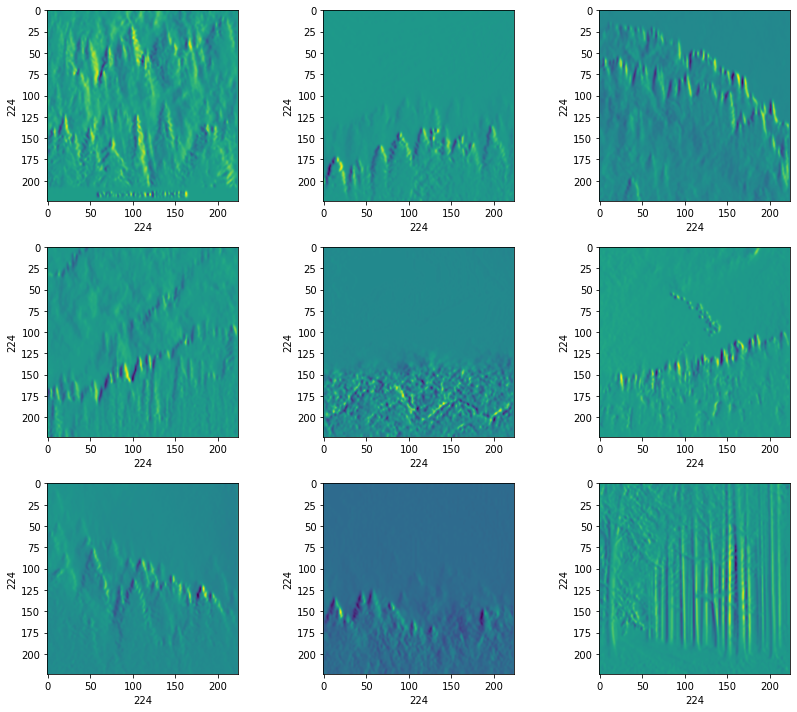

In [ ]:
#Plotting detected horizontal edges
plt.figure(figsize=(12,10))

for img in range(1,10):
  plt.subplot(3,3,img)
  plt.tight_layout()
  plt.imshow(sobelx[img-1])
  plt.xlabel(sobelx[img-1].shape[1], fontsize=10)
  plt.ylabel(sobelx[img-1].shape[0], fontsize=10)

**Vertical Edges**

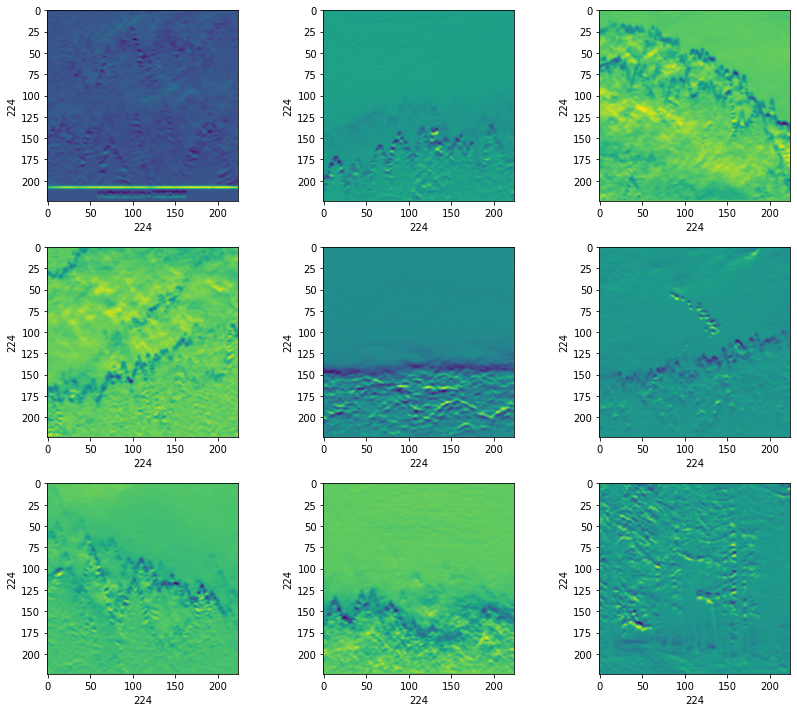

In [ ]:
#Plotting detected vertical edges
plt.figure(figsize=(12,10))

for img in range(1,10):
  plt.subplot(3,3,img)
  plt.tight_layout()
  plt.imshow(sobely[img-1])
  plt.xlabel(sobely[img-1].shape[1], fontsize=10)
  plt.ylabel(sobely[img-1].shape[0], fontsize=10)

**Combined Horizontal and Vertical Edges**

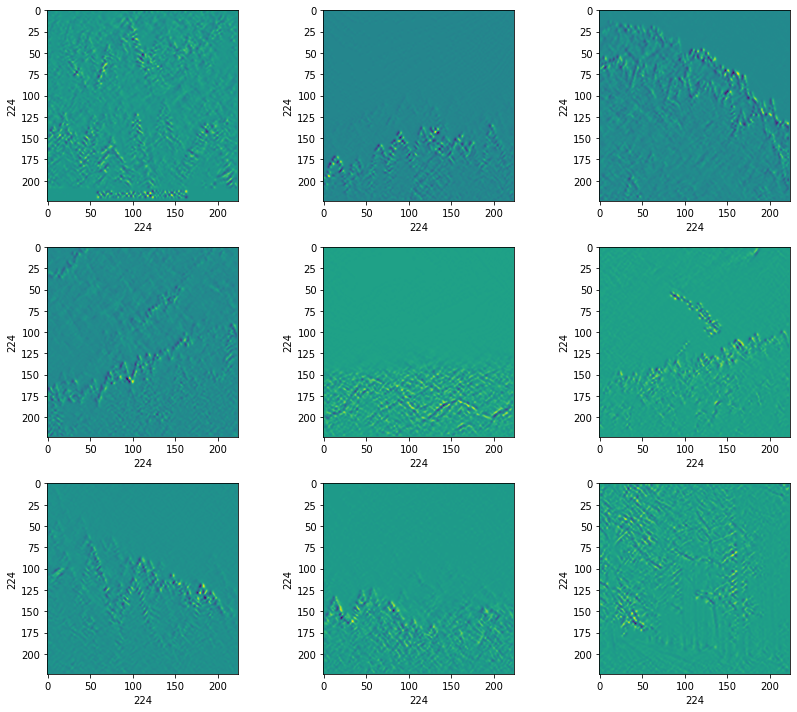

In [ ]:
#Combining the two types of edges detected
plt.figure(figsize=(12,10))

for img in range(1,10):
  plt.subplot(3,3,img)
  plt.tight_layout()
  plt.imshow(sobelxy[img-1])
  plt.xlabel(sobelxy[img-1].shape[1], fontsize=10)
  plt.ylabel(sobelxy[img-1].shape[0], fontsize=10)

**Canny Edge Detetction after applying a Gaussian Filter**

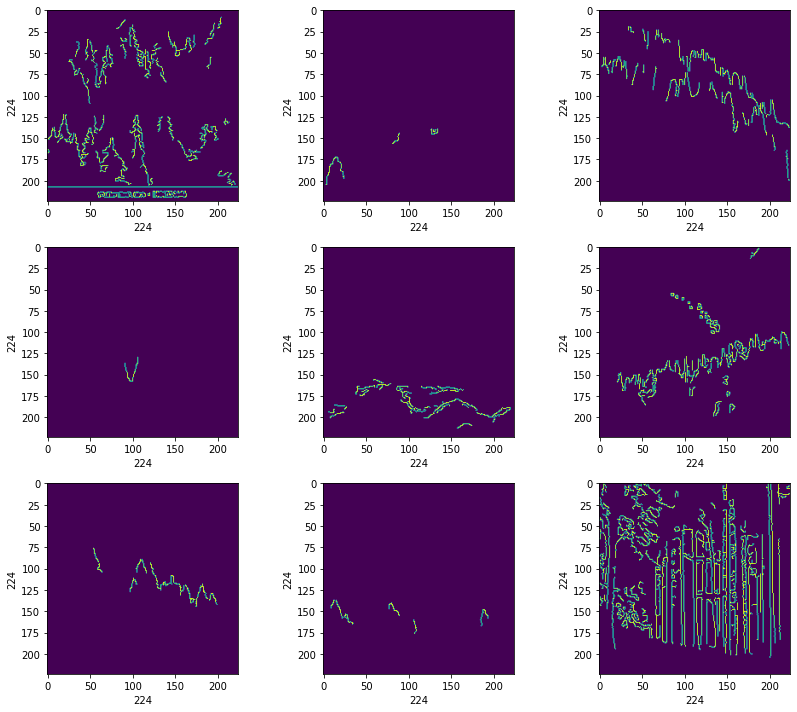

In [ ]:
#Extracting Canny Edge Detetction with Gaussian Filter
plt.figure(figsize=(12,10))

for img in range(1,10):
  plt.subplot(3,3,img)
  plt.tight_layout()
  plt.imshow(edgesx[img-1])
  plt.xlabel(edgesx[img-1].shape[1], fontsize=10)
  plt.ylabel(edgesx[img-1].shape[0], fontsize=10)

## 6. ORB Keypoint Detection

In [ ]:
kp = []
des = []
Xkp = []

for img in X:
  img = img*255
  img = img.astype(np.uint8)
  # Initiate ORB detector
  orb = cv2.ORB_create()
  # find the keypoints with ORB
  kpx = orb.detect(img,None)
  # compute the descriptors with ORB
  kpx, desx = orb.compute(img, kpx)
  kp.append(kpx)
  des.append(desx)
  # draw only keypoints location,not size and orientation
  Xkp.append(cv2.drawKeypoints(img, kpx, None, color=(0,255,0), flags=0))

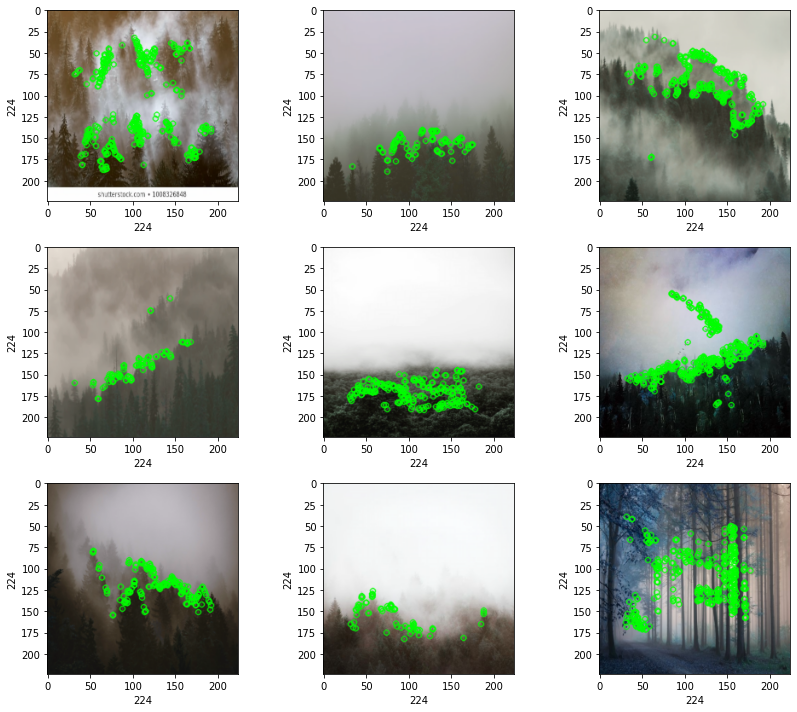

In [ ]:
plt.figure(figsize=(12,10))

for img in range(1,10):
  plt.subplot(3,3,img)
  plt.tight_layout()
  plt.imshow(Xkp[img-1])
  plt.xlabel(Xkp[img-1].shape[1], fontsize=10)
  plt.ylabel(Xkp[img-1].shape[0], fontsize=10)

# Training

## Combination 1 :- Noise Filter + Segmentation + LAB color space

Noise filter

In [ ]:
#checking shape for the images with noise filtered
np.array(gf).shape

(2311, 224, 224, 3)

Segmentation

In [ ]:
#checking shape for the segmented images 
np.array(th).shape

(2311, 224, 224, 3)

LAB

In [ ]:
#checking shape for the images with LAB color extraction
np.array(lab_X).shape

(2311, 224, 224, 3)

In [ ]:
#Combining all three features of the images
data = np.array(gf) + np.array(th) + np.array(lab_X)

## Model Training

In [ ]:
#Switching to GPU environment if available
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    print("Device:", tpu.master())
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

Not connected to a TPU runtime. Using CPU/GPU strategy


In [ ]:
#Defining image size and number of classes globally as 224 and 3
IMG_SIZE = 224
NUM_CLASSES = 3

Label encoding the target classes and Splitting the data into training, testing and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
encoder = LabelBinarizer()

In [ ]:
encoder.fit(dy)

LabelBinarizer()

In [ ]:
y = encoder.transform(dy)

In [ ]:
len(data)

2311

In [ ]:
len(dy)

2311

In [ ]:
#Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, stratify = y, shuffle = True)

In [ ]:
#Splitting training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, stratify = y_train)

Training using Inception v3

In [ ]:
from keras import Model
import tensorflow
from tensorflow.keras.applications  import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_preprocess_input
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Dense
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def build_inception_based_model(num_classes):
    # weights are pre-trained with imagenet
    base_model = InceptionV3(include_top=False, weights='imagenet', pooling='max', input_shape=(224, 224, 3))

    x = base_model.output
    x = Dense(2048, activation='relu', name='fc_1')(x)
    x = Dense(1024, activation='relu', name='fc_2')(x)
    predictions = Dense(num_classes, activation='softmax', name='fc_class')(x)  # dense layer with neurons with softmax
    model = Model(inputs=base_model.inputs, outputs=predictions)  # input is based model input, output is custom

    # by default only the fc layers are trainable (layers in base_model are not trainable)
    for layer in base_model.layers:
        layer.trainable = False
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [ ]:
with strategy.scope():
    model = build_inception_based_model(num_classes=NUM_CLASSES)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 111, 111, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                           

Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
epochs = 50
model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks = [early_stop])

Epoch 1/50
36/36 [==============================] - 12s 123ms/step - loss: 1816.3225 - accuracy: 0.4138 - val_loss: 11.9608 - val_accuracy: 0.4712
Epoch 2/50
36/36 [==============================] - 1s 35ms/step - loss: 4.0964 - accuracy: 0.5385 - val_loss: 0.8180 - val_accuracy: 0.6111
Epoch 3/50
36/36 [==============================] - 1s 36ms/step - loss: 0.7471 - accuracy: 0.6870 - val_loss: 0.7992 - val_accuracy: 0.6481
Epoch 4/50
36/36 [==============================] - 1s 36ms/step - loss: 0.6817 - accuracy: 0.7109 - val_loss: 0.7698 - val_accuracy: 0.6399
Epoch 5/50
36/36 [==============================] - 1s 35ms/step - loss: 0.6542 - accuracy: 0.7126 - val_loss: 0.7160 - val_accuracy: 0.6770
Epoch 6/50
36/36 [==============================] - 1s 35ms/step - loss: 0.5691 - accuracy: 0.7675 - val_loss: 0.7700 - val_accuracy: 0.6770
Epoch 7/50
36/36 [==============================] - 1s 35ms/step - loss: 0.5271 - accuracy: 0.7816 - val_loss: 0.7516 - val_accuracy: 0.6687
Epoch 8

Accuracy and Loss curves on Training and Validation sets.

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

loss  accuracy   val_loss  val_accuracy
0  1816.322510  0.413793  11.960806      0.471193
1     4.096375  0.538462   0.818001      0.611111
2     0.747142  0.687003   0.799171      0.648148
3     0.681720  0.710875   0.769799      0.639918
4     0.654210  0.712644   0.716023      0.676955

In [ ]:
losses = losses.drop(0)

In [ ]:
losses.rename(columns = {'loss':'training_loss', 'accuracy':'training_accuracy'}, inplace = True)

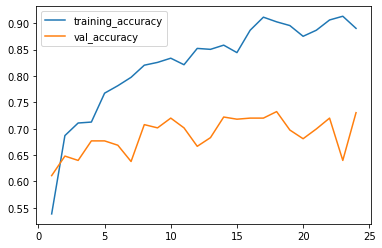

In [ ]:
losses[['training_accuracy', 'val_accuracy']].plot()

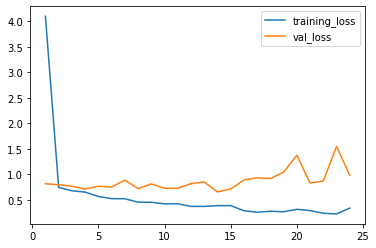

In [ ]:
losses[['training_loss', 'val_loss']].plot()

In [ ]:
pred = model.predict(X_test)

22/22 [==============================] - 3s 20ms/step


In [ ]:
#function to predict from test data
def preds(pred):
  pred = list(pred)
  max_pred = max(pred)
  for i in range(0,len(pred)):
    if pred[i] == max_pred:
      pred[i] = 1
    else:
      pred[i] = 0
  return pred

In [ ]:
y_pred = []
for i in range(0, len(pred)):
  y_pred.append(preds(pred[i]))

In [ ]:
y_pred = encoder.inverse_transform(pred, threshold = 0)

In [ ]:
y_test = encoder.inverse_transform(y_test, threshold = 0)

1. Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.7723342939481268

2. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('\tF\tNF\tSF')
print('F\t'+str(cm[0][0])+'\t' + str(cm[0][1]) + '\t' + str(cm[0][2]))
print('NF\t'+str(cm[1][0])+'\t' + str(cm[1][1]) + '\t' + str(cm[1][2]))
print('SF\t'+str(cm[2][0])+'\t' + str(cm[2][1]) + '\t' + str(cm[2][2]))

	F	NF	SF
F	286	30	10
NF	79	224	19
SF	11	9	26


3. Precision-Recall-Fscore-Support

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
precision_recall_fscore_support(y_test, y_pred, average = 'macro')

(0.6950255324051943, 0.7127233929047746, 0.6984927552584318, None)

## Combination 2 : Edge Detection Sobel Filters + Gaussian Noise Filter + ORB Keypoins :- 

In [ ]:
#checking shape for images with edges extracted
np.array(sobelxyxy).shape

(2311, 224, 224, 3)

In [ ]:
#checking shape for images noise filtered
np.array(gf).shape

(2311, 224, 224, 3)

In [ ]:
#checking shape for images with keypoints detected
np.array(Xkp).shape

(2311, 224, 224, 3)

In [ ]:
#Combining the extracted features into single set
ata = np.array(sobelxyxy) + np.array(gf) + np.array(Xkp)

### Model Training

In [ ]:
#Switching to GPU environment if available
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    print("Device:", tpu.master())
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

Not connected to a TPU runtime. Using CPU/GPU strategy


Splitting training, testing and validation dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, stratify = y, shuffle = True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, stratify = y_train)

Training

In [ ]:
def build_inception_based_model(num_classes):
    # weights are pre-trained with imagenet
    base_model = InceptionV3(include_top=False, weights='imagenet', pooling='max', input_shape=(224, 224, 3))

    x = base_model.output
    x = Dense(2048, activation='relu', name='fc_1')(x)
    x = Dense(1024, activation='relu', name='fc_2')(x)
    predictions = Dense(num_classes, activation='softmax', name='fc_class')(x)  # dense layer with neurons with softmax
    model = Model(inputs=base_model.inputs, outputs=predictions)  # input is based model input, output is custom

    # by default only the fc layers are trainable (layers in base_model are not trainable)
    for layer in base_model.layers:
        layer.trainable = False
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [ ]:
with strategy.scope():
    model = build_inception_based_model(num_classes=NUM_CLASSES)

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_470 (Conv2D)            (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 111, 111, 32  96         ['conv2d_470[0][0]']             
 Normalization)                 )                                                           

In [ ]:
#training model with 50 epochs
epochs = 50
model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks = [early_stop])

Epoch 1/50
36/36 [==============================] - 11s 126ms/step - loss: 1388.5706 - accuracy: 0.5323 - val_loss: 6.8446 - val_accuracy: 0.4630
Epoch 2/50
36/36 [==============================] - 1s 36ms/step - loss: 2.1147 - accuracy: 0.5950 - val_loss: 1.9736 - val_accuracy: 0.6996
Epoch 3/50
36/36 [==============================] - 1s 36ms/step - loss: 0.8645 - accuracy: 0.6994 - val_loss: 1.0162 - val_accuracy: 0.6790
Epoch 4/50
36/36 [==============================] - 1s 37ms/step - loss: 0.8613 - accuracy: 0.7020 - val_loss: 0.9616 - val_accuracy: 0.7202
Epoch 5/50
36/36 [==============================] - 1s 36ms/step - loss: 1.2435 - accuracy: 0.6729 - val_loss: 0.8507 - val_accuracy: 0.6872
Epoch 6/50
36/36 [==============================] - 1s 37ms/step - loss: 0.6889 - accuracy: 0.7286 - val_loss: 1.0207 - val_accuracy: 0.5473
Epoch 7/50
36/36 [==============================] - 1s 37ms/step - loss: 0.8103 - accuracy: 0.6844 - val_loss: 1.1347 - val_accuracy: 0.7037
Epoch 8/

Accuracy and Loss Curves for training and validation

In [ ]:
#Accuracy and Loss Curves for training and validation
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

loss  accuracy  val_loss  val_accuracy
0  1388.570557  0.532272  6.844645      0.462963
1     2.114737  0.595049  1.973601      0.699588
2     0.864454  0.699381  1.016213      0.679012
3     0.861346  0.702034  0.961598      0.720165
4     1.243499  0.672856  0.850692      0.687243

In [ ]:
losses = losses.drop(0)

In [ ]:
losses.rename(columns = {'loss':'training_loss', 'accuracy':'training_accuracy'}, inplace = True)

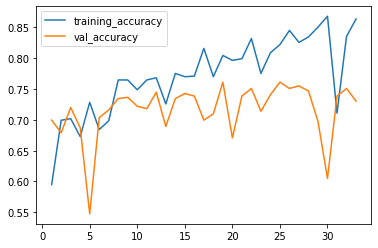

In [ ]:
losses[['training_accuracy', 'val_accuracy']].plot()

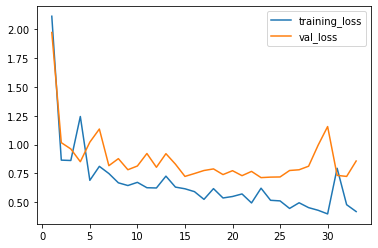

In [ ]:
losses[['training_loss', 'val_loss']].plot()

Predicting on the test dataset

In [ ]:
# Predicting on the test dataset
pred = model.predict(X_test)

22/22 [==============================] - 3s 20ms/step


In [ ]:
def preds(pred):
  pred = list(pred)
  max_pred = max(pred)
  for i in range(0,len(pred)):
    if pred[i] == max_pred:
      pred[i] = 1
    else:
      pred[i] = 0
  return pred

In [ ]:
y_pred = []
for i in range(0, len(pred)):
  y_pred.append(preds(pred[i]))

In [ ]:
y_pred = encoder.inverse_transform(pred, threshold = 0)

In [ ]:
y_test = encoder.inverse_transform(y_test, threshold = 0)

1. Accuracy Score

In [ ]:
accuracy_score(y_test, y_pred)

0.770893371757925

2. Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('\tF\tNF\tSF')
print('F\t'+str(cm[0][0])+'\t' + str(cm[0][1]) + '\t' + str(cm[0][2]))
print('NF\t'+str(cm[1][0])+'\t' + str(cm[1][1]) + '\t' + str(cm[1][2]))
print('SF\t'+str(cm[2][0])+'\t' + str(cm[2][1]) + '\t' + str(cm[2][2]))

	F	NF	SF
F	283	43	0
NF	70	252	0
SF	24	22	0


3. Precision-Recall-F1 Score

In [ ]:
precision_recall_fscore_support(y_test, y_pred, average = 'macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5152052704538291, 0.5502356183871254, 0.5312844349167551, None)

# Combination 3 :- All features combined

In [ ]:
#Switching to GPU environment if available
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    print("Device:", tpu.master())
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

Not connected to a TPU runtime. Using CPU/GPU strategy


In [ ]:
IMG_SIZE = 224
NUM_CLASSES = 3

Label encoding the target classes

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
encoder = LabelBinarizer()

In [ ]:
encoder.fit(y)

LabelBinarizer()

In [ ]:
y = encoder.transform(y)

Splitting the dataset into training, testing and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, shuffle = True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, stratify = y_train)

Import Inception V3

In [ ]:
from keras import Model
import tensorflow
from tensorflow.keras.applications  import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_preprocess_input
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Dense
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def build_inception_based_model(num_classes):
    # weights are pre-trained with imagenet
    base_model = InceptionV3(include_top=False, weights='imagenet', pooling='max', input_shape=(224, 224, 3))

    x = base_model.output
    x = Dense(2048, activation='relu', name='fc_1')(x)
    x = Dense(1024, activation='relu', name='fc_2')(x)
    predictions = Dense(num_classes, activation='softmax', name='fc_class')(x)  # dense layer with neurons with softmax
    model = Model(inputs=base_model.inputs, outputs=predictions)  # input is based model input, output is custom

    # by default only the fc layers are trainable (layers in base_model are not trainable)
    for layer in base_model.layers:
        layer.trainable = False
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [ ]:
with strategy.scope():
    model = build_inception_based_model(num_classes=NUM_CLASSES)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=20)

In [ ]:
X_val.shape

(486, 224, 224, 3)

In [ ]:
epochs = 50
model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks = [early_stop])

Epoch 1/50
36/36 [==============================] - 19s 242ms/step - loss: 108.6648 - accuracy: 0.6693 - val_loss: 0.4324 - val_accuracy: 0.8683
Epoch 2/50
36/36 [==============================] - 4s 107ms/step - loss: 0.4395 - accuracy: 0.8833 - val_loss: 0.3665 - val_accuracy: 0.8786
Epoch 3/50
36/36 [==============================] - 4s 109ms/step - loss: 0.3282 - accuracy: 0.8912 - val_loss: 0.4370 - val_accuracy: 0.8621
Epoch 4/50
36/36 [==============================] - 4s 109ms/step - loss: 0.1621 - accuracy: 0.9514 - val_loss: 0.4821 - val_accuracy: 0.8786
Epoch 5/50
36/36 [==============================] - 4s 109ms/step - loss: 0.1432 - accuracy: 0.9452 - val_loss: 0.5850 - val_accuracy: 0.7737
Epoch 6/50
36/36 [==============================] - 4s 111ms/step - loss: 1.8609 - accuracy: 0.8444 - val_loss: 0.6064 - val_accuracy: 0.8889
Epoch 7/50
36/36 [==============================] - 4s 112ms/step - loss: 0.1398 - accuracy: 0.9602 - val_loss: 0.3165 - val_accuracy: 0.9033
Epo

Accuracy and Loss Curves

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

loss  accuracy  val_loss  val_accuracy
0  108.664810  0.669319  0.432381      0.868313
1    0.439455  0.883289  0.366548      0.878601
2    0.328192  0.891247  0.436988      0.862140
3    0.162063  0.951370  0.482102      0.878601
4    0.143155  0.945181  0.585045      0.773663

In [ ]:
losses = losses.drop(0)

In [ ]:
losses.rename(columns = {'loss':'training_loss', 'accuracy':'training_accuracy'}, inplace = True)

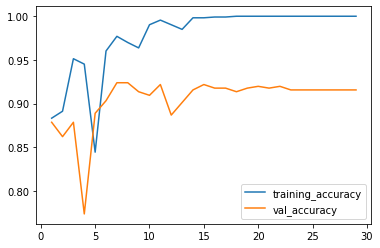

In [ ]:
losses[['training_accuracy', 'val_accuracy']].plot()

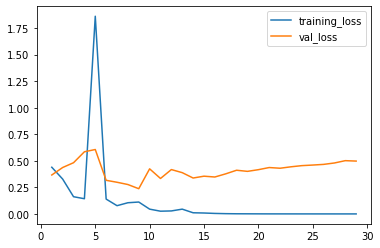

In [ ]:
losses[['training_loss', 'val_loss']].plot()

Predictions on Test Data

In [ ]:
pred = model.predict(X_test)

22/22 [==============================] - 4s 122ms/step


In [ ]:
def preds(pred):
  pred = list(pred)
  max_pred = max(pred)
  for i in range(0,len(pred)):
    if pred[i] == max_pred:
      pred[i] = 1
    else:
      pred[i] = 0
  return pred

In [ ]:
y_pred = []
for i in range(0, len(pred)):
  y_pred.append(preds(pred[i]))

In [ ]:
y_pred = encoder.inverse_transform(pred, threshold = 0)

In [ ]:
y_test = encoder.inverse_transform(y_test, threshold = 0)

1. Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9121037463976945

2. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('\tF\tNF\tSF')
print('F\t'+str(cm[0][0])+'\t' + str(cm[0][1]) + '\t' + str(cm[0][2]))
print('NF\t'+str(cm[1][0])+'\t' + str(cm[1][1]) + '\t' + str(cm[1][2]))
print('SF\t'+str(cm[2][0])+'\t' + str(cm[2][1]) + '\t' + str(cm[2][2]))

	F	NF	SF
F	309	16	1
NF	20	299	3
SF	16	5	25


3. Precision - Recall - FScore

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
precision_recall_fscore_support(y_test, y_pred, average = 'macro')

(0.8973653798100948, 0.8066341500590634, 0.8397147513127289, None)